<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González Paredes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
<center><h5>git</h5></center>

## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como: 
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate 
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [8]:
import librosa
import numpy as np
import torch

def extract_audio_features(audio_path):
    # Cargar el audio
    y, sr = librosa.load(audio_path, sr=None)
    
    # Media
    mean = np.mean(y)
    
    # Kurtosis
    kurtosis = np.mean((y - mean) ** 4) / np.mean((y - mean) ** 2) ** 2
    
    # Skewness
    skewness = np.mean((y - mean) ** 3) / np.mean((y - mean) ** 2) ** (3/2)
    
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # Spectral Centroid
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    
    # Energía
    energy = np.mean(librosa.feature.rms(y=y))
    
    # RMSE (Root Mean Square Error)
    rmse = np.mean(librosa.feature.rms(y=y))
    
    # Frecuencia fundamental utilizando Yin
    fundamental_frequency = librosa.yin(y, fmin=50, fmax=11025)
    fundamental_frequency_mean = np.mean(fundamental_frequency)

    # Normalizar características utilizando PyTorch
    features = torch.tensor([mean, kurtosis, skewness, zcr, spectral_centroid, energy, rmse, fundamental_frequency_mean], dtype=torch.float32)
    normalized_features = (features - torch.mean(features)) / torch.std(features)
    
    return normalized_features

# Ruta al archivo de audio
audio_path = "Imperial_March.wav"

# Extracción de características
audio_features = extract_audio_features(audio_path)
print(audio_features)


tensor([-0.5091, -0.5030, -0.5092, -0.5091,  2.1586, -0.5090, -0.5090,  0.8897])


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512. 


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 67901 but got size 16976 for tensor number 1 in the list.

### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


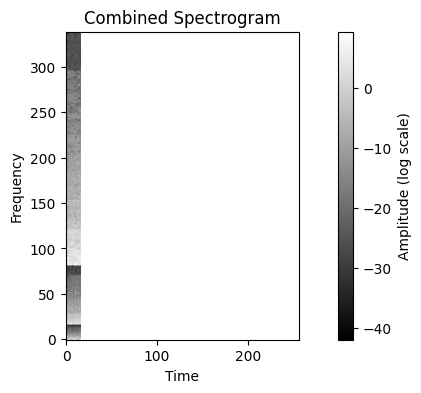

In [13]:
import torch
import torchaudio
import matplotlib.pyplot as plt

def get_spectrogram(audio_path, n_ffts):
    waveform, sample_rate = torchaudio.load(audio_path)
    max_len = max(len(waveform), max(n_ffts))
    waveform = torch.nn.functional.pad(waveform, (0, max_len - len(waveform)))
    
    spec_list = []
    max_freqs = []
    for n_fft in n_ffts:
        spectrogram = torchaudio.transforms.Spectrogram(n_fft=n_fft)(waveform)
        max_freqs.append(spectrogram.size(1))
        spec_list.append(spectrogram[:, :, :min(max_freqs)])
        
    # Padding for smaller spectrograms
    max_freq = max(max_freqs)
    padded_specs = []
    for spec in spec_list:
        pad_size = max_freq - spec.size(2)
        padded_specs.append(torch.nn.functional.pad(spec, (0, pad_size)))

    # Concatenar los espectrogramas a lo largo del eje de la frecuencia
    spectrogram_combined = torch.cat(padded_specs, dim=1)
    return spectrogram_combined

# Ruta al archivo de audio
audio_path = "Imperial_March.wav"

# Tamaños de la transformada rápida de Fourier (n_fft)
n_ffts = [32, 128, 512]

# Obtener el espectrograma combinado para diferentes tamaños de n_fft
spectrogram_combined = get_spectrogram(audio_path, n_ffts)

# Mostrar el espectrograma combinado
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram_combined.log2()[0, :, :].numpy(), cmap='gray', origin='lower')
plt.title("Combined Spectrogram")
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Amplitude (log scale)')
plt.show()


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado. 

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

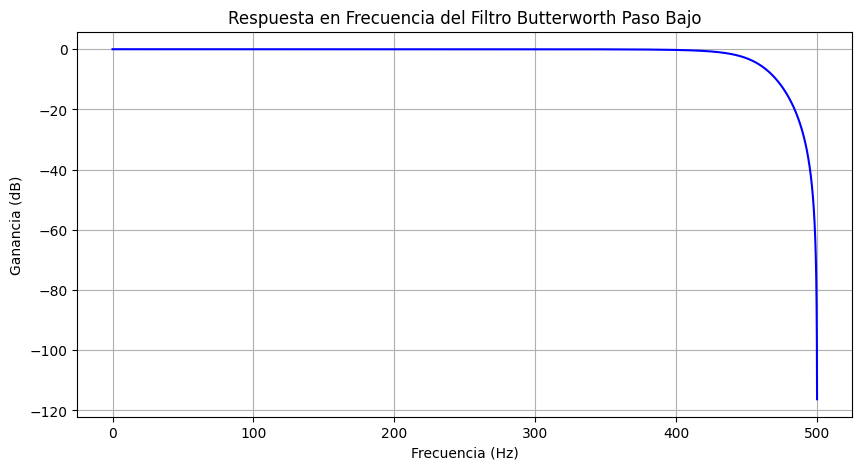

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Especificaciones del filtro
order = 2       # Orden del filtro
cutoff_freq = 450    # Frecuencia de corte en Hz

# Frecuencia de muestreo
fs = 1000            # Frecuencia de muestreo en Hz

# Calculando los coeficientes del filtro Butterworth
b, a = signal.butter(order, cutoff_freq/(fs/2), btype='low')

# Mostrando la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, worN=8000)
frequencies = (fs * 0.5 / np.pi) * w

# Graficando la respuesta en frecuencia
plt.figure(figsize=(10, 5))
plt.plot(frequencies, 20 * np.log10(abs(h)), 'b')
plt.title("Respuesta en Frecuencia del Filtro Butterworth Paso Bajo")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Ganancia (dB)")
plt.grid()
plt.show()


## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
